In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# define a function to read first and second column from csv file
def read_csv(csv_file):
    coordinates = []
    with open(csv_file, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            try:
                x = float(row[1])
                y = float(row[2])
                coordinates.append((x,y))
            except ValueError:
                print(f"ignoring line {row}")
    return coordinates

In [2]:
import math
import math

def moving_average_variable_threshold(coordinates, window_size):
    smoothed_coordinates = []
    half_window = window_size // 2
    
    for i in range(len(coordinates)):
        if i < half_window or i >= len(coordinates) - half_window:
            smoothed_coordinates.append(coordinates[i])
        else:
            sum_x = sum([coord[0] for coord in coordinates[i-half_window:i+half_window+1]])
            sum_y = sum([coord[1] for coord in coordinates[i-half_window:i+half_window+1]])
            smoothed_x = sum_x / window_size
            smoothed_y = sum_y / window_size
            
            # Calculate the Euclidean distance between the last two coordinates
            last_distance = math.sqrt((coordinates[i-1][0] - coordinates[i-2][0])**2 + (coordinates[i-1][1] - coordinates[i-2][1])**2)
            
            # Calculate the Euclidean distance between the current and previous coordinates
            current_distance = math.sqrt((coordinates[i][0] - coordinates[i-1][0])**2 + (coordinates[i][1] - coordinates[i-1][1])**2)
            
            # Check if the current distance exceeds the distance between the last two coordinates
            if current_distance > last_distance:
                # Replace the current coordinate with the moving average of the last three coordinates
                smoothed_x = sum([coord[0] for coord in coordinates[i-half_window-1:i]]) / (half_window + 1)
                smoothed_y = sum([coord[1] for coord in coordinates[i-half_window-1:i]]) / (half_window + 1)
            
            smoothed_coordinates.append((smoothed_x, smoothed_y))
    
    return smoothed_coordinates


csv_file = 'TestVid2_deepocsort.csv'
window_size = 3
# threshold = 5
original_coordinates = read_csv(csv_file)
# smoothed_coordinates = moving_average(orig_coordinates, window_size, threshold)
# Example usage
# original_coordinates = [(10, 20), (12, 22), (25, 28), (40, 50), (55, 45), (65, 30)]
# window_size = 3

smoothed_coordinates = moving_average_variable_threshold(original_coordinates, window_size)

# Print the original and smoothed coordinates
print("Original Coordinates:")
for coord in original_coordinates:
    print(coord)

print("\nSmoothed Coordinates:")
for coord in smoothed_coordinates:
    print(coord)


ignoring line ['ï»¿num', 'x', 'y', 'h', 'w']
Original Coordinates:
(718.0, 426.0)
(719.0, 429.0)
(720.0, 432.0)
(722.0, 438.0)
(723.0, 442.0)
(725.0, 449.0)
(727.0, 452.0)
(729.0, 439.0)
(731.0, 430.0)
(733.0, 422.0)
(734.0, 414.0)
(736.0, 407.0)
(736.0, 401.0)
(739.0, 397.0)
(740.0, 391.0)
(742.0, 388.0)
(742.0, 383.0)
(744.0, 380.0)
(744.0, 377.0)
(745.0, 375.0)
(746.0, 373.0)
(748.0, 372.0)
(749.0, 372.0)
(750.0, 371.0)
(751.0, 370.0)
(752.0, 370.0)
(752.0, 370.0)
(753.0, 370.0)
(754.0, 371.0)
(755.0, 372.0)
(756.0, 373.0)
(757.0, 373.0)
(758.0, 375.0)
(759.0, 377.0)
(760.0, 380.0)
(761.0, 381.0)
(761.0, 383.0)
(762.0, 386.0)
(763.0, 388.0)
(769.0, 394.0)
(773.0, 398.0)
(776.0, 401.0)
(779.0, 405.0)
(782.0, 409.0)
(786.0, 414.0)
(789.0, 420.0)
(794.0, 426.0)
(797.0, 431.0)
(802.0, 438.0)
(805.0, 445.0)
(809.0, 452.0)
(813.0, 460.0)
(817.0, 468.0)
(822.0, 476.0)
(826.0, 486.0)
(831.0, 496.0)
(836.0, 506.0)
(844.0, 505.0)
(847.0, 498.0)
(850.0, 492.0)
(855.0, 487.0)
(858.0, 480.0)
(86

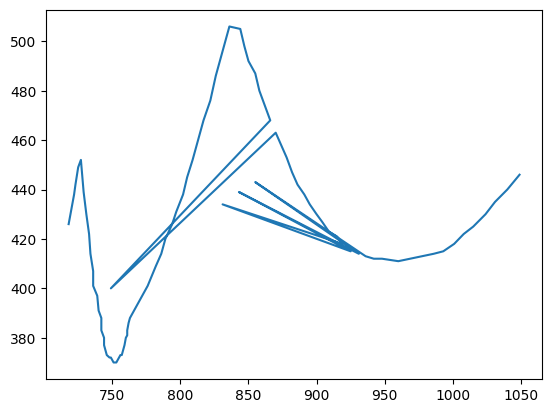

In [3]:
#plot the smoothed coordinates
x = [coord[0] for coord in original_coordinates]
y = [coord[1] for coord in original_coordinates]
plt.plot(x, y, label='Original Coordinates')

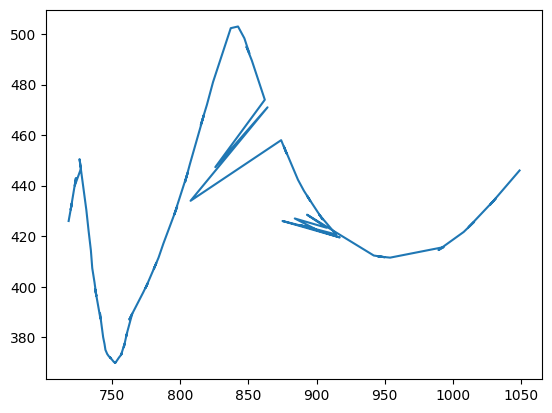

In [4]:
#plot the smoothed coordinates
x = [coord[0] for coord in smoothed_coordinates]
y = [coord[1] for coord in smoothed_coordinates]
plt.plot(x, y, label='Smoothed Coordinates')